In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from utils import *

In [2]:
# img = cv2.imread('D:/corpor_download/grid_problem_samples/test_20190828013632_0.9956723598767885.png')
img = cv2.imread('test_20190828163632_0.627050833495524_paint.png')
img = cv2.imread('test_20190828171810_0.5823200745819752_paint.png')

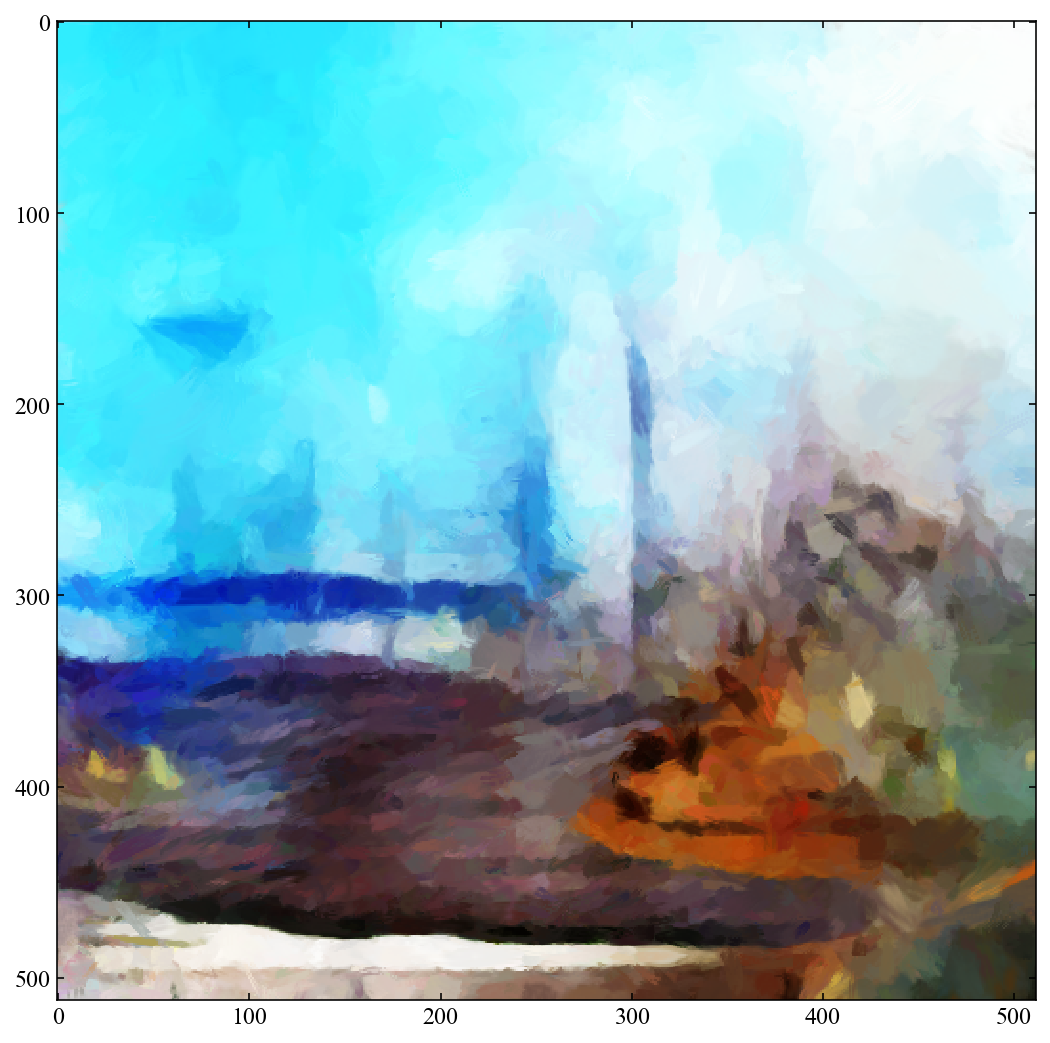

In [3]:
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # matplotlib色彩通道是RGB, cv2是BGR

梯度  
http://ex2tron.wang

**垂直与水平边缘提取**

In [4]:
# 自己进行垂直边缘提取
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)
dst_v = cv2.filter2D(img, -1, kernel)
# 自己进行水平边缘提取
dst_h = cv2.filter2D(img, -1, kernel.T)
# 横向并排对比显示
cv2.imshow('edge', np.hstack((img, dst_v, dst_h)))
cv2.waitKey(0)

-1

**Sobel算子对上述简单实现**

In [5]:
sobelx = cv2.Sobel(img, ddepth=-1, dx=2, dy=0, ksize=3)  # 只计算x方向
sobely = cv2.Sobel(img, ddepth=-1, dx=0, dy=2, ksize=3)  # 只计算y方向
cv2.imshow('edge', np.hstack((img, sobelx, sobely)))
cv2.waitKey(0)

-1

**还有比Sobel更好用的Scharr算子**

In [6]:
# 垂直边缘提取
kernel = np.array([[-3, 0, 3],
                   [-10, 0, 10],
                   [-3, 0, 3]], dtype=np.float32)
dst_v = cv2.filter2D(img, -1, kernel)
# 水平边缘提取
dst_h = cv2.filter2D(img, -1, kernel.T)
# 横向并排对比显示
cv2.imshow('edge', np.hstack((img, dst_v, dst_h)))
cv2.waitKey(0)

-1

## Laplacian算子实现垂直、水平、斜对角检测
一维的一阶和二阶差分公式分别为：  
$$
\begin{array}{c}{\frac{\partial f}{\partial x}=f(x+1)-f(x)} \\ {\frac{\partial^{2} f}{\partial x^{2}}=f(x+1)+f(x-1)-2 f(x)}\end{array}
$$
提取前面的系数，那么一维的Laplacian滤波核是
$$
K=\left[\begin{array}{lll}{1} & {-2} & {1}\end{array}\right]
$$
而对于二维函数$f(x,y)$，两个方向的二阶差分分别是：
$$
\begin{array}{l}{\frac{\partial^{2} f}{\partial x^{2}}=f(x+1, y)+f(x-1, y)-2 f(x, y)} \\ {\frac{\partial^{2} f}{\partial y^{2}}=f(x, y+1)+f(x, y-1)-2 f(x, y)}\end{array}
$$
合在一起就是：
$$
\nabla^{2} f(x, y)=f(x+1, y)+f(x-1, y)+f(x, y+1)+f(x, y-1)-4 f(x, y)
$$
那么二维的Laplacian滤波核就是：
$$
K=\left[\begin{array}{ccc}{0} & {1} & {0} \\ {1} & {-4} & {1} \\ {0} & {1} & {0}\end{array}\right]
$$
这就是Laplacian算子的图像卷积模板，有些资料中在此基础上考虑斜对角情况，将卷积核拓展为：
$$
K=\left[\begin{array}{ccc}{1} & {1} & {1} \\ {1} & {-8} & {1} \\ {1} & {1} & {1}\end{array}\right]
$$
OpenCV中直接使用`cv2.Laplacian()`函数：

https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html

In [7]:
laplacian = cv2.Laplacian(img, ddepth=-1)
cv2.imshow('edge', np.hstack((img, laplacian)))
cv2.waitKey(0)

-1

**手动实现cv2.Laplacian**

In [8]:

kernel = np.array([[0,  1, 0],
                   [1, -4, 1],
                   [0,  1, 0]], dtype=np.float32)
laplac = cv2.filter2D(img, -1, kernel)

# 横向并排对比显示
cv2.imshow('edge', np.hstack((img, laplac)))
cv2.waitKey(0)

-1

**手动实现cv2.Laplacian包括斜对角情况**

In [92]:

kernel = np.array([[1,  1, 1],
                   [1, -8, 1],
                   [1,  1, 1]], dtype=np.float32)
laplac = cv2.filter2D(img, -1, kernel)

# 横向并排对比显示
cv2.imshow('edge', np.hstack((img, laplac)))
cv2.waitKey(0)

-1

## 边缘检测
Canny边缘检测方法常被誉为边缘检测的最优方法

In [94]:
img = cv2.imread('D:/corpor_download/grid_problem_samples/test_20190828013632_0.9956723598767885.png',0)
edges = cv2.Canny(img, 40,70)  # canny边缘检测, 这里img只能是单通道， 这里40，70是两阈值
cv2.imshow('canny', np.hstack((img, edges)))
cv2.waitKey(0)


-1

Canny推荐的高低阈值比在2:1到3:1之间。  
很多情况下，阈值分割后再检测边缘，效果会更好：

In [95]:
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
edges = cv2.Canny(thresh, 30, 70)
cv2.imshow('canny', np.hstack((img, thresh, edges)))
cv2.waitKey(0)

-1

而阈值的选取，可以考虑Otsu阈值法：

In [97]:
# 固定阈值法
ret1, th1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
# Otsu阈值法
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# 先进行高斯滤波，再使用Otsu阈值法
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


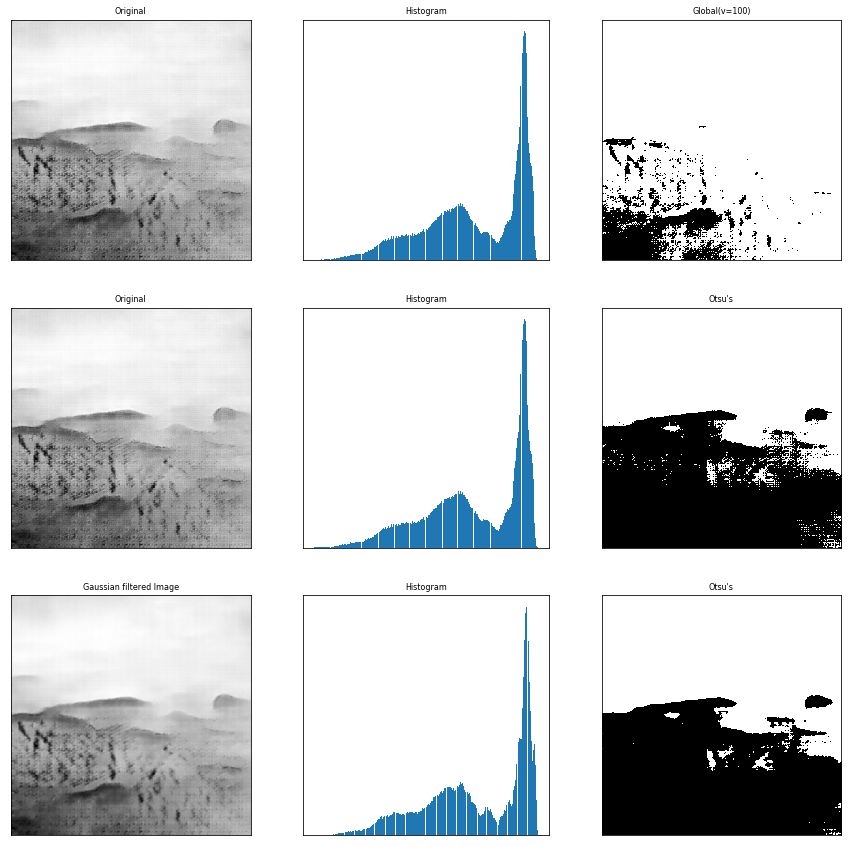

In [98]:
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original', 'Histogram', 'Global(v=100)',
          'Original', 'Histogram', "Otsu's",
          'Gaussian filtered Image', 'Histogram', "Otsu's"]
plt.figure(figsize=(15,15))
for i in range(3):
    # 绘制原图
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3], fontsize=8)
    plt.xticks([]), plt.yticks([])
    # 绘制直方图plt.hist，ravel函数将数组降成一维
    plt.subplot(3, 3, i * 3 + 2)
    plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1], fontsize=8)
    plt.xticks([]), plt.yticks([])
    # 绘制阈值图
    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()

## 直方图

直方图是可以对整幅图的灰度分布进行整体了解的图示，通过直方图我们可以对图像的对比度、亮度和灰度分布等有一个直观了解  

### 计算直方图：

1. 使用opencv的函数cv2.calcHist(images, channels, mask, histSize, ranges):  
参数1：要计算的原图，以方括号的传入，如：[img]。  
参数2：类似前面提到的dims，灰度图写[0]就行，彩色图B/G/R分别传入[0]/[1]/[2]。  
参数3：要计算的区域ROI，计算整幅图的话，写None。  
参数4：也叫bins,子区段数目，如果我们统计0-255每个像素值，bins=256；如果划分区间，比如0-15, 16-31…240-255这样16个区间，bins=16。  
参数5：range,要计算的像素值范围，一般为[0,256)。  

In [99]:
# cv
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

2. 使用numpy的函数 np.bincount():  
    用Numpy的函数计算，其中ravel()函数将二维矩阵展平变成一维数组

In [100]:
hist = np.bincount(img.ravel(), minlength=256)  # 性能：0.003163 s

### 绘制直方图
使用Matplotlib自带的绘制工具plt.hist()绘制。

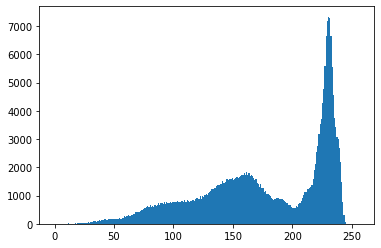

In [101]:
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

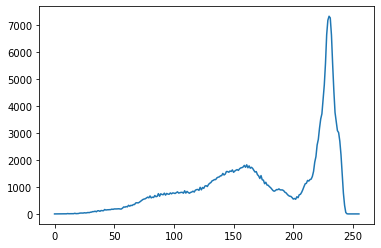

In [102]:
# 当然，也可以用前面计算出来的结果绘制：
plt.plot(hist)

OpenCV中用cv2.equalizeHist() 实现均衡化:

In [9]:
img = cv2.imread('test_20190828171810_0.5823200745819752_paint.png')
# img = cv2.imread('test_20190828163632_0.627050833495524_paint.png')
img = cv2.imread('cover_newmodel.jpg')
(b, g, r) = cv2.split(img)
bH = cv2.equalizeHist(b)
gH = cv2.equalizeHist(g)
rH = cv2.equalizeHist(r)
# 合并每一个通道
equ2 = cv2.merge((bH, gH, rH))
# 水平拼接原图和均衡图
result2 = np.hstack((img,equ2))
cv2.imshow('equal',result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

CLAHE 自适应均衡化  
直方图均衡化是应用于整幅图片的，会导致一些图片部位太亮，导致大部分细节丢失，因此引入自适应均衡来解决这个问题。  
它在每一个小区域内（默认8×8）进行直方图均衡化。当然，如果有噪点的话，噪点会被放大，需要对小区域内的对比度进行了限制。  
彩色图同样需要split为r,g,b后均衡，然后merge。

In [10]:
# 自适应均衡化，参数可选
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe = cv2.createCLAHE(clipLimit=15.0, tileGridSize=(5,5))
clahe = cv2.createCLAHE(clipLimit=15.0, tileGridSize=(4,4))

bH = clahe.apply(b)
gH = clahe.apply(g)
rH = clahe.apply(r)
equ2 = cv2.merge((bH, gH, rH))
result2 = np.hstack((img,equ2))
cv2.imshow('equal',result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## HSV 
https://zh.wikipedia.org/wiki/HSL%E5%92%8CHSV%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%97%B4    
**HSL和HSV都是一种将RGB色彩模型中的点在圆柱坐标系中的表示法。这两种表示法试图做到比基于笛卡尔坐标系的几何结构RGB更加直观。**    
HSL即色相、饱和度、亮度（英语：Hue, Saturation, Lightness）。HSV即色相、饱和度、明度（英语：Hue, Saturation, Value），又称HSB，其中B即英语：Brightness。    
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  

H: 是色彩的基本属性，就是平常所说的颜色名称，如红色、黄色等。   
S: 饱和度  是指色彩的纯度，越高色彩越纯，低则逐渐变灰，取0-100%的数值。   
V: 明度  0-100%    

**如果将对比度增强算法用到RGB的每个分量上，那么人类对该图像的色彩感知就会变得不够理想了；而如果仅对HSV的亮度分量进行增强，让色彩信息不受影响，那么效果就会或多或少地与期望接近。**

In [11]:

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(1,1))

(H,S,V) = cv2.split(cv2.cvtColor(img,cv2.COLOR_BGR2HSV))

# H = clahe.apply(H)
# S = clahe.apply(S)
# V = clahe.apply(V)

# 手动调节：---------------------------------------------------------
# 归一化：For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255].
H,S,V = H/179., S/255., V/255.
H,S,V = H, S, V # 
# 将亮度层使用浮雕卷积核：
p, q = 0, 1
# kernel = np.array([[q, 0, p],
#                    [0, 0, 0],
#                   [-p, 0, -q]], dtype=np.float32)

# kernel = np.array([[q, 0, 0, 0, -p],
#                    [0, q, 0, -p, 0],
#                    [0, 0, 0,  0, 0],
#                    [0, p, 0, -q, 0],
#                    [p, 0, 0, 0, -q] ], dtype=np.float32)

p, q, s = 0.1, 0.01, 0.61 # p,q,s控制浮雕三个方向的强度，矩阵最中心的值控制整体亮度大小
kernel = np.array([[-q,  -s,  0],
                   [-p, 0.85, p],
                   [0,    s,  q]], dtype=np.float32)

T = V 
T = cv2.filter2D(T, -1, kernel) 
T = np.clip(T, 0, 1.)
V = T

H,S,V = H*179., S*255., V*255.
H,S,V = H.astype('uint8'),S.astype('uint8'),V.astype('uint8')
#-------------------------------------------------------------------
V = clahe.apply(V)

# 合并每一个通道
equ2 = cv2.merge((H,S,V))
# 水平拼接原图和均衡图
result2 = np.hstack((img,cv2.cvtColor(equ2,cv2.COLOR_HSV2BGR)))
cv2.imshow('equal',result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

浮雕：  
https://en.wikipedia.org/wiki/Image_embossing  
http://setosa.io/ev/image-kernels/

In [55]:

(H,L,S) = cv2.split(cv2.cvtColor(img,cv2.COLOR_BGR2HLS))

# 手动调节：---------------------------------------------------------
# 归一化：For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255].
H,L,S = H/179., L/255., S/255.
H,L,S = H, L, S
# 将亮度层使用浮雕卷积核： 
p, q, s,t = 0.,0., 0.71,0.  # p,q,s控制浮雕三个方向的强度，矩阵最中心的值控制整体亮度大小
kernel = np.array([[-q, -s,  t],
                   [-p, 1.2,p],
                   [-t,  s,  q]], dtype=np.float32)

# 对下面这个kernel进行改写可能可以获得更出色的效果
# kernel = np.array([[-1, -p, -p, -p,  0],
#                    [-p, -1, -1,  0,  p],
#                    [-p, -1,  3,  p,  p],
#                    [-p,  0,  p,  1,  p],
#                    [ 0,  p,  p,  p,  1]], dtype=np.float32)
L = cv2.filter2D(L, -1, kernel)
L = np.clip(L,0,1)
H,L,S = H*179., L*255., S*255.

H,L,S = H.astype('uint8'),L.astype('uint8'),S.astype('uint8')
#-------------------------------------------------------------------

# 在前面一步让亮度过大，在这里重新限制亮度
H,L,S = H, Gamma_trans(L, 255, 1.5), Gamma_trans(S, 255, 0.8)
# 合并每一个通道
equ2 = cv2.merge((H,L,S))
# 水平拼接原图和均衡图
result2 = np.hstack((img,cv2.cvtColor(equ2,cv2.COLOR_HLS2BGR)))
cv2.imshow('equal',result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 对比度增强

直方图规范化：

In [33]:
H,L,S = cv2.split(cv2.cvtColor(img,cv2.COLOR_BGR2HLS))

def MaxMinNormal(I,out_min, out_max):
    '''
    input: 
    I: this vector to be scaled
    out_min : the minimun of out vector
    out_max : the maximun of out vector
    '''
    Imax = I.max()
    Imin = I.min()
    out = out_min + (out_max - out_min)/(Imax - Imin) * (I-Imin)
    return out.astype('uint8')

H,L,S = MaxMinNormal(H,0,179),MaxMinNormal(L,0,255),MaxMinNormal(S,0,255)

res = cv2.merge((H,L,S))
result = np.hstack((img,cv2.cvtColor(res,cv2.COLOR_HLS2BGR)))
cv2.imshow('equal',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
# 伽马变换
def Gamma_trans(I, I_max, gamma):
    '''
    gamma: if your intersted region is too bright, set gamma > 1 decreasing contrast.
    and if your intersted region is too bright dark, set 1> gamma > 0 to increase contrast.
    I_max: is the maximun of the channel of I.
    '''
    fI = I/I_max
    out = np.power(fI, gamma)
    out = out*I_max
    return out.astype("uint8")

H,L,S = cv2.split(cv2.cvtColor(img,cv2.COLOR_BGR2HLS))

H,L,S = H, Gamma_trans(L, 255, 1.2), Gamma_trans(S, 255, 0.8)
res = cv2.merge((H,L,S))
result = np.hstack((img,cv2.cvtColor(res,cv2.COLOR_HLS2BGR)))
cv2.imshow('equal',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
cv2.imshow('',img)
cv2.waitKey(0)

-1

In [14]:
cv2.destroyAllWindows()